In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load CIFAR-10 dataset for color images
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Initialize LeNet-5 model for color images
net_color = LeNet5Color()

# Define loss function and optimizer
criterion_color = nn.CrossEntropyLoss()
optimizer_color = optim.Adam(net_color.parameters(), lr=0.001)

# Lists to store training/test accuracy and loss for color images
train_accuracy_list_color = []
test_accuracy_list_color = []
train_loss_list_color = []
test_loss_list_color = []

# Train the model for color images
for epoch in range(10):  # Change the number of epochs as needed
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_color.zero_grad()
        outputs = net_color(inputs)
        loss = criterion_color(outputs, labels)
        loss.backward()
        optimizer_color.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch+1}/{10}, Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

    # Save training accuracy and loss
    train_accuracy_list_color.append(train_accuracy)
    train_loss_list_color.append(train_loss)

    # Test the model for color images
    correct_test = 0
    total_test = 0
    test_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net_color(inputs)
            loss = criterion_color(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_loss /= len(testloader)
    print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}')

    # Save test accuracy and loss
    test_accuracy_list_color.append(test_accuracy)
    test_loss_list_color.append(test_loss)



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/10, Training Loss: 1.5572, Training Accuracy: 0.4290
Testing Loss: 1.3526, Testing Accuracy: 0.5034
Epoch 2/10, Training Loss: 1.2954, Training Accuracy: 0.5399
Testing Loss: 1.2676, Testing Accuracy: 0.5507
Epoch 3/10, Training Loss: 1.1848, Training Accuracy: 0.5815
Testing Loss: 1.2438, Testing Accuracy: 0.5647
Epoch 4/10, Training Loss: 1.1073, Training Accuracy: 0.6103
Testing Loss: 1.1862, Testing Accuracy: 0.5850
Epoch 5/10, Training Loss: 1.0571, Training Accuracy: 0.6287
Testing Loss: 1.1508, Testing Accuracy: 0.6109
Epoch 6/10, Training Loss: 1.0205, Training Accuracy: 0.6423
Testing Loss: 1.1168, Testing Accuracy: 0.6224
Epoch 7/10, Training Loss: 0.9893, Training Accuracy: 0.6525
Testing Loss: 1.1722, Testing Accuracy: 0.6009
Epoch 8/10, Training Loss: 0.9693, Training Accuracy: 0.6599
Testing Loss: 1.1109, Testing Accuracy: 0.6219
Epoch 9/10, Training Loss: 0.9475, Training Acc

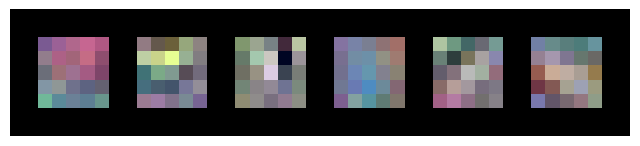

In [2]:

import torchvision.utils as vutils

# ... (previous code)

# Show the first layer filters for color images using make_grid
filter_weights = net_color.conv1.weight.data.clone()
filter_weights -= filter_weights.min()
filter_weights /= filter_weights.max()

grid = vutils.make_grid(filter_weights, nrow=6, normalize=True)
plt.figure(figsize=(8, 8))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')
plt.show()

In [3]:

# Save intermediate activations from the first layer for color images
dataiter = iter(trainloader)
images, labels = dataiter.next()
first_layer_activations_color = net_color.conv1(images)
np.save('first_layer_activations_train5.npy', first_layer_activations_color.detach().numpy())

dataiter = iter(testloader)
images, labels = dataiter.next()
first_layer_activations_color = net_color.conv1(images)
np.save('first_layer_activations_test5.npy', first_layer_activations_color.detach().numpy())

# Save training and test accuracy and loss for color images
np.save('train_accuracy_color5.npy', np.array(train_accuracy_list_color))
np.save('test_accuracy_color5.npy', np.array(test_accuracy_list_color))
np.save('train_loss_color5.npy', np.array(train_loss_list_color))
np.save('test_loss_color5.npy', np.array(test_loss_list_color))

print('Finished Training for color images')

Finished Training for color images


In [4]:
torch.save(net_color.state_dict(), 'lenet5_color_model.pth')
